Text-Preprocessing

importing libraries

In [1]:
import pandas as pd
import string, nltk
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to C:\Users\Nithin
[nltk_data]     Srinivaas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Nithin
[nltk_data]     Srinivaas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Nithin
[nltk_data]     Srinivaas/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Nithin
[nltk_data]     Srinivaas/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Loading the dataset

In [2]:
file_path = r"C:\Users\Nithin Srinivaas\OneDrive\Documents\Fake_Review_Project\fake_reviews_dataset.csv"
df = pd.read_csv(file_path)


In [3]:
df

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...


data preprocessing

check for null values

In [4]:
df.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


EDA

summary statistics of a DataFrame

In [6]:
df.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [7]:
df['rating'].value_counts()

rating
5.0    24559
4.0     7965
3.0     3786
1.0     2155
2.0     1967
Name: count, dtype: int64

visualizing the propotions of ratings

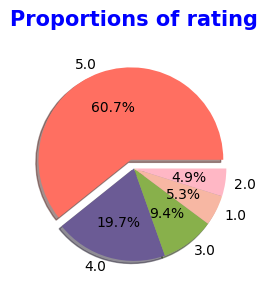

In [8]:
plt.figure(figsize=(5,3))

labels = df['rating'].value_counts().keys()
values = df['rating'].value_counts().values
explode = (0.1, 0, 0, 0, 0)
colors = ['#ff6f61', '#6b5b95', '#88b04b', '#f7b7a3', '#ffb7c5']
plt.pie(values, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%', colors=colors)
plt.title('Proportions of rating', fontweight='bold', fontsize=15, pad=20, color='Blue')

plt.show()

Datatype convertion

In [9]:
# object to string conversion 
df['text_'] = df['text_'].astype(str)

clean and standardize text data

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Nithin
[nltk_data]     Srinivaas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

removing stopwords, punctuation, and digits, while lowering the text case

In [11]:
# function to preprocess the text data
# Load stopwords and punctuation once
stop_words = set(stopwords.words('english'))
punctuation_set = set(string.punctuation)

def preprocess(text):
    return ' '.join(
        word for word in word_tokenize(text.lower())  # Convert text to lowercase to standardize
        if word not in stop_words and not word.isdigit() and word not in punctuation_set
    )

In [12]:
preprocess(df['text_'][4])

'nice set good quality set two months'

In [13]:
from tqdm import tqdm

# Apply the function with a progress bar
tqdm.pandas()
df['text_'] = df['text_'].progress_apply(preprocess)

100%|██████████| 40432/40432 [00:11<00:00, 3447.83it/s]


Applying PorterStemmer to reduce words to their root form

In [14]:
# Stemmer 
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
df['text_'] = df['text_'].apply(lambda x: stem_words(x))

reducing words to their base or dictionary form using WordNetLemmatizer

In [15]:
#lemmetizer
lemmatizer = WordNetLemmatizer()
def lemm_words(text):
    return [lemmatizer.lemmatize(word) for word in text.split()]
df['text_'] = df['text_'].apply(lambda text : lemm_words(text))

In [16]:
df['text_'].head()

0    [love, well, made, sturdi, comfort, love, pretti]
1    [love, great, upgrad, origin, 've, mine, coupl...
2       [pillow, save, back, love, look, feel, pillow]
3           [miss, inform, use, great, product, price]
4          [nice, set, good, qualiti, set, two, month]
Name: text_, dtype: object

In [17]:
# Join the list of words in each row to form a single sentence, the form that is typically required for training machine learning models.
df['cleaned_text'] = df['text_'].apply(lambda words: ' '.join(words))

In [20]:
#saving the csv file
df.to_csv(r"C:\Users\Nithin Srinivaas\OneDrive\Documents\Fake_Review_Project\TP_DS.csv",index=False)

In [21]:
df.head()

,category,rating,label,text_,cleaned_text
0,Home_and_Kitchen_5,5.0,CG,"[love, well, made, sturdi, comfort, love, pretti]",love well made sturdi comfort love pretti
1,Home_and_Kitchen_5,5.0,CG,"[love, great, upgrad, origin, 've, mine, coupl...",love great upgrad origin 've mine coupl year
2,Home_and_Kitchen_5,5.0,CG,"[pillow, save, back, love, look, feel, pillow]",pillow save back love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,"[miss, inform, use, great, product, price]",miss inform use great product price
4,Home_and_Kitchen_5,5.0,CG,"[nice, set, good, qualiti, set, two, month]",nice set good qualiti set two month


In [22]:
# adds quotes around each string in the 'cleaned_text' column,to ensure that each entry in the column is treated as a single field 
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: f'"{x}"')

In [23]:
# Save to CSV with quotes included
df.to_csv('output_with_quotes.csv', index=False)